In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DatetimeIndex


In [3]:
#import the pumpkin data
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
#check for missing value
pumpkins.isnull().sum()


City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
#lets choose the columns to be used
new_pumpkins = pumpkins.loc[:, ['Package', "Date", 'Low Price', 'High Price']]
new_pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


In [6]:
#convert the Date column to datetime

Date = DatetimeIndex(new_pumpkins['Date'])
Month = DatetimeIndex(new_pumpkins['Date']).month
# new_pumpkins['Date'] = pd.to_datetime(new_pumpkins['Date'])


In [7]:
#find average price
price = (new_pumpkins['High Price'] + new_pumpkins['Low Price'])/2

In [8]:
#create a new dataframe with data and average price
Pumpkin_df = {'Package': new_pumpkins['Package'],
              'Date':Date,
              'Month': Month,
              'Low Price': new_pumpkins['Low Price'],
              'High Price': new_pumpkins['High Price'],
              'Price': price}
Pumkins = pd.DataFrame(Pumpkin_df)

In [9]:
#filter and keep only pumkin in bushel and reset index
Pumkins = Pumkins[Pumkins['Package'].str.contains('bushel', case=True, regex= True)].reset_index(drop=True)

In [10]:
Pumkins

,Package,Date,Month,Low Price,High Price,Price
0,1 1/9 bushel cartons,2016-09-24,9,15.00,15.0,15.000
1,1 1/9 bushel cartons,2016-09-24,9,18.00,18.0,18.000
2,1 1/9 bushel cartons,2016-10-01,10,18.00,18.0,18.000
3,1 1/9 bushel cartons,2016-10-01,10,17.00,17.0,17.000
4,1 1/9 bushel cartons,2016-10-08,10,15.00,15.0,15.000
...,...,...,...,...,...,...
410,1/2 bushel cartons,2016-09-30,9,15.00,15.0,15.000
411,1/2 bushel cartons,2016-09-30,9,13.75,15.0,14.375
412,1/2 bushel cartons,2016-09-30,9,10.75,15.0,12.875
413,1/2 bushel cartons,2016-09-30,9,12.00,12.0,12.000


In [11]:
#normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.
Pumkins.loc[Pumkins['Package'].str.contains('1/2'), 'Price'] = Pumkins['Price']/(1/2)
Pumkins.loc[Pumkins['Package'].str.contains('1 1/9'), 'Price'] = Pumkins['Price']/(1 + 1/9)

In [12]:
Pumkins

,Package,Date,Month,Low Price,High Price,Price
0,1 1/9 bushel cartons,2016-09-24,9,15.00,15.0,13.50
1,1 1/9 bushel cartons,2016-09-24,9,18.00,18.0,16.20
2,1 1/9 bushel cartons,2016-10-01,10,18.00,18.0,16.20
3,1 1/9 bushel cartons,2016-10-01,10,17.00,17.0,15.30
4,1 1/9 bushel cartons,2016-10-08,10,15.00,15.0,13.50
...,...,...,...,...,...,...
410,1/2 bushel cartons,2016-09-30,9,15.00,15.0,30.00
411,1/2 bushel cartons,2016-09-30,9,13.75,15.0,28.75
412,1/2 bushel cartons,2016-09-30,9,10.75,15.0,25.75
413,1/2 bushel cartons,2016-09-30,9,12.00,12.0,24.00


Text(0.5, 1.0, 'Price of Pumkin per month')

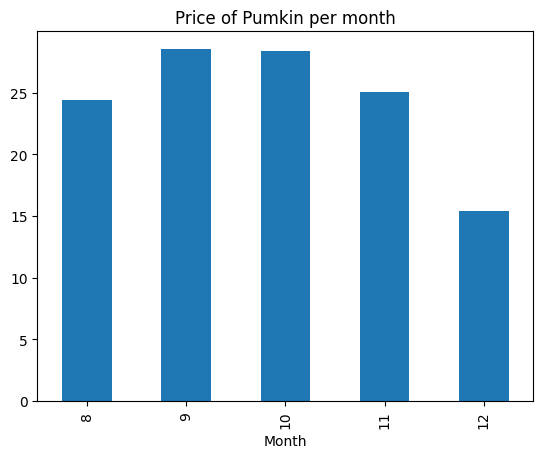

In [13]:
#Visualizing the data
Pumkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.title('Price of Pumkin per month')

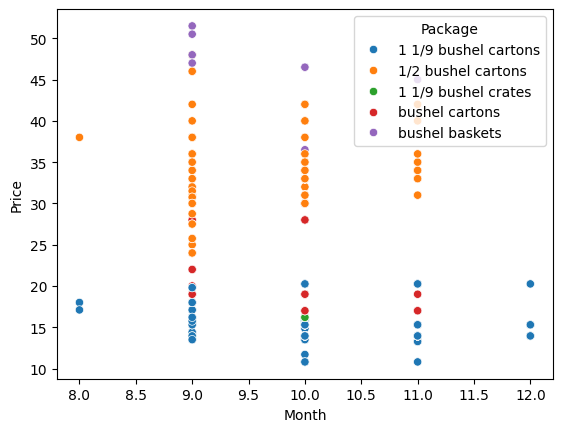

In [ ]:
#lets visualize the data using scatter plot to find possibly a linearity 
import seaborn as sns
sns.scatterplot(x=Pumkins['Month'], y=Pumkins['Price'], hue=Pumkins['Package'])
plt.show()

## no correlation between month and price